In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("Iris.csv")

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.drop('Id',axis=1,inplace=True)

In [7]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## EDA

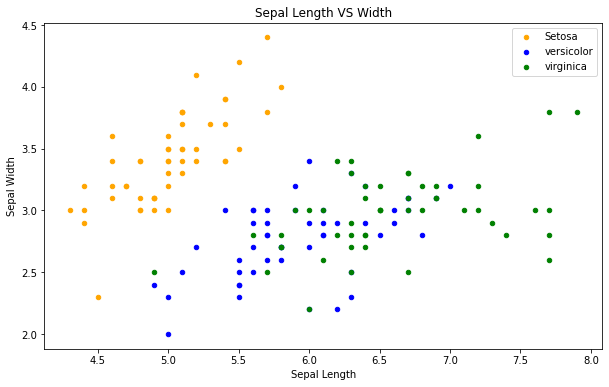

In [14]:
fig = df[df.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
df[df.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

This graph is relation of Sepal Length and Width

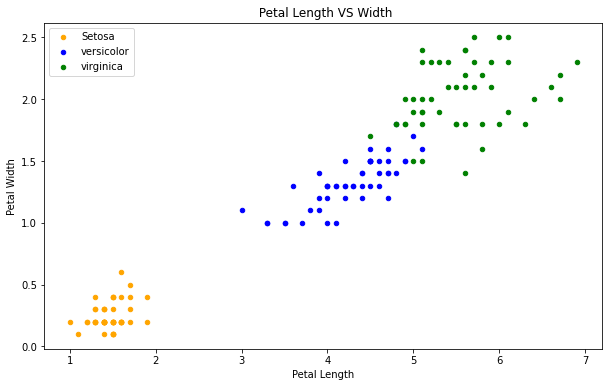

In [15]:
fig = df[df.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
df[df.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

Graph depicting relationship of Petal Length and Width

Inferences:
    Petal Features have better segemntation vs Sepal Features

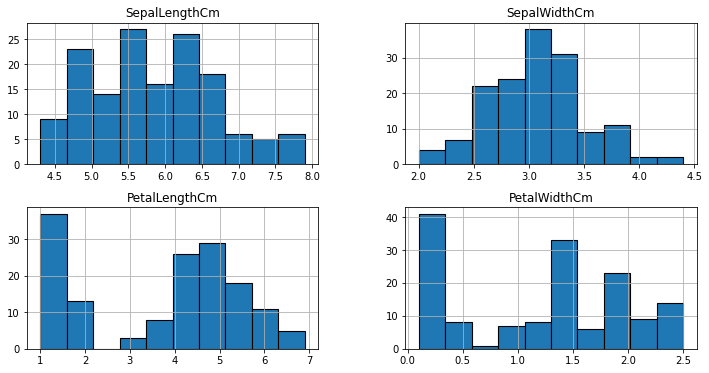

In [17]:
df.hist(edgecolor='black',linewidth=1.1)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

Distribution of Length and Width

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

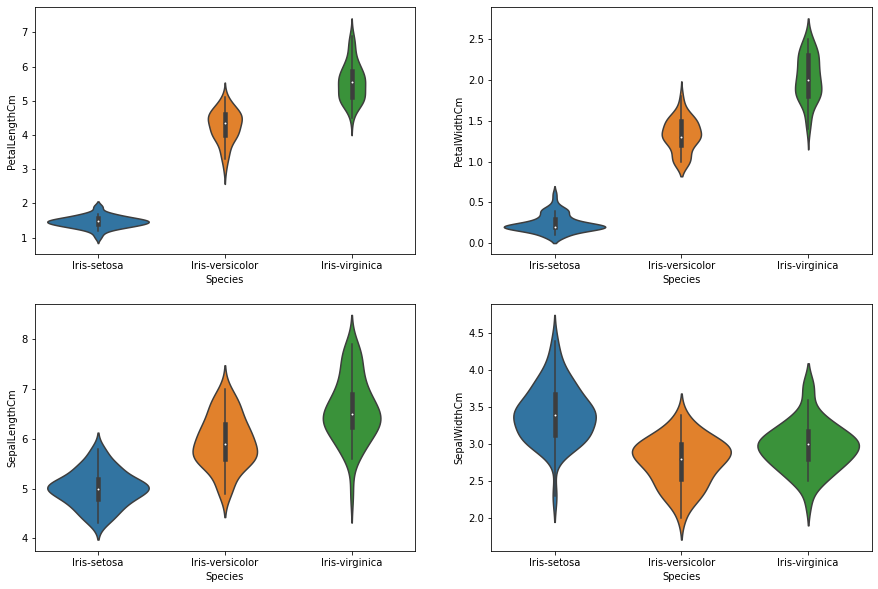

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

Variation of length and width w.r.t species

In [23]:
#IMPORTING ML PACKAGES:
from sklearn.linear_model import LogisticRegression
from sklearn. model_selection import train_test_split
from sklearn import metrics

In [25]:
df.shape

(150, 5)

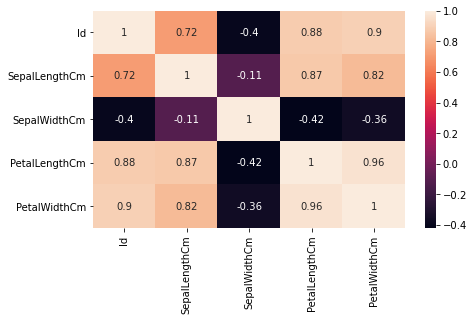

In [26]:
#Correlation Matrix
plt.figure(figsize=(7,4))
sns.heatmap(iris.corr(),annot=True,)
plt.show()

In [31]:
#Train Test Split:
train,test=train_test_split(df,test_size=0.4)
print(train.shape)
print(test.shape)

(90, 5)
(60, 5)


In [32]:
X_train= train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_train=train.Species
X_test= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_test =test.Species 

In [33]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
18,5.7,3.8,1.7,0.3
133,6.3,2.8,5.1,1.5
93,5.0,2.3,3.3,1.0
75,6.6,3.0,4.4,1.4
118,7.7,2.6,6.9,2.3


In [34]:
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
91,6.1,3.0,4.6,1.4
103,6.3,2.9,5.6,1.8
122,7.7,2.8,6.7,2.0
58,6.6,2.9,4.6,1.3
64,5.6,2.9,3.6,1.3


In [35]:
y_train.head()

18         Iris-setosa
133     Iris-virginica
93     Iris-versicolor
75     Iris-versicolor
118     Iris-virginica
Name: Species, dtype: object

In [52]:
#LOGISTIC REGRESSION:
model=LogisticRegression()
model.fit(X_train,y_train)
predicted=model.predict(X_test)
print("Accuracy of Logistic Regression using all features together is:",metrics.accuracy_score(predicted,y_test)*100,"%")

Accuracy of Logistic Regression using all features together is: 93.33333333333333 %


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### NOW USING PETALS AND SEPALS SEPARATELY:

In [40]:
petal=df[['PetalLengthCm','PetalWidthCm','Species']]
sepal=df[['SepalLengthCm','SepalWidthCm','Species']]

In [48]:
p_train,p_test=train_test_split(petal,test_size=0.4,random_state=0)  #petals
xp_train=p_train[['PetalWidthCm','PetalLengthCm']]
yp_train=p_train.Species
xp_test=p_test[['PetalWidthCm','PetalLengthCm']]
yp_test=p_test.Species


s_train,s_test=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
xs_train=s_train[['SepalWidthCm','SepalLengthCm']]
ys_train=s_train.Species
xs_test=s_test[['SepalWidthCm','SepalLengthCm']]
ys_test=s_test.Species

In [53]:
#LOGISTIC REGRESSION:
model=LogisticRegression()
model.fit(xp_train,yp_train)
predicted=model.predict(xp_test)
print("Accuracy of Logistic Regression using Petals:",metrics.accuracy_score(predicted,yp_test)*100,"%")

model.fit(xs_train,ys_train)
predicted=model.predict(xs_test)
print("Accuracy of Logistic Regression using Sepals:",metrics.accuracy_score(predicted,ys_test)*100,"%")



Accuracy of Logistic Regression using Petals: 91.66666666666666 %
Accuracy of Logistic Regression using Sepals: 82.22222222222221 %
